In [1]:

# # NFL Play-by-Play Data Exploration
# 
# This notebook explores the structure and contents of the 2024 NFL play-by-play data.

# ## Setup and Data Loading

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Add the parent directory to the path so we can import our scripts
sys.path.append('..')
from scripts.data_loader import load_pbp_data

# Set plot style
plt.style.use('ggplot')
sns.set_palette('colorblind')

# Load the data
data_path = '../data/pbp-2024.csv'
df = load_pbp_data(data_path)
print(f"Loaded {len(df):,} plays from the 2024 NFL season")

# ## Data Overview

/var/folders/cq/dyx2ttcj47lckh2j68_y1qn80000gn/T/ipykernel_28217/2983744453.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Loaded 53,283 plays from the 2024 NFL season


In [3]:

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nData types:")
print(df.dtypes)

Dataset shape: (53283, 50)

Data types:
GameId                                     int64
GameDate                          datetime64[ns]
Quarter                                    int64
Minute                                     int64
Second                                     int64
OffenseTeam                               object
DefenseTeam                               object
Down                                       int64
ToGo                                       int64
YardLine                                   int64
Unnamed: 10                              float64
SeriesFirstDown                            int64
Unnamed: 12                              float64
NextScore                                  int64
Description                               object
TeamWin                                    int64
Unnamed: 16                              float64
Unnamed: 17                              float64
SeasonYear                                 int64
Yards                        

In [4]:

# Display a sample of the data
df.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards,game_seconds,two_min_drill,field_position,is_scoring_play,is_redzone
0,2024122907,2024-12-29,3,7,3,GB,MIN,1,10,16,...,False,NaN,False,NaN,0,2277,False,84,False,True
1,2024122907,2024-12-29,3,9,44,MIN,GB,0,0,0,...,False,NaN,False,NaN,0,2116,False,100,False,True
2,2024122907,2024-12-29,3,9,44,MIN,GB,0,0,15,...,False,NaN,False,NaN,0,2116,False,85,False,True
3,2024122907,2024-12-29,3,9,50,MIN,GB,1,10,18,...,False,NaN,False,NaN,0,2110,False,82,True,True
4,2024122907,2024-12-29,3,15,0,MIN,GB,0,0,35,...,False,NaN,False,NaN,0,1800,False,65,False,False


In [5]:

# Summary statistics for numeric columns
df.describe()

# ## Game and Team Distribution

,GameId,GameDate,Quarter,Minute,Second,Down,ToGo,YardLine,Unnamed: 10,SeriesFirstDown,...,TeamWin,Unnamed: 16,Unnamed: 17,SeasonYear,Yards,Challenger,YardLineFixed,PenaltyYards,game_seconds,field_position
count,5.328300e+04,53283,53283.000000,53283.000000,53283.000000,53283.000000,53283.000000,53283.000000,0.0,53283.000000,...,53283.0,0.0,0.0,53283.0,53283.000000,0.0,53283.000000,53283.000000,53283.000000,53283.000000
mean,2.024196e+09,2024-11-09 05:17:03.793704960,2.572134,6.336261,27.506559,1.536156,6.585797,26.433328,NaN,0.412571,...,0.0,NaN,NaN,2024.0,3.854644,NaN,58.963628,0.523188,1907.238106,58.963628
min,2.024090e+09,2024-09-05 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,...,0.0,NaN,NaN,2024.0,-20.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,2.024101e+09,2024-10-06 00:00:00,2.000000,2.000000,11.000000,1.000000,1.000000,13.000000,NaN,0.000000,...,0.0,NaN,NaN,2024.0,0.000000,NaN,35.000000,0.000000,1038.000000,35.000000
50%,2.024111e+09,2024-11-10 00:00:00,3.000000,6.000000,27.000000,1.000000,8.000000,30.000000,NaN,0.000000,...,0.0,NaN,NaN,2024.0,0.000000,NaN,59.000000,0.000000,1800.000000,59.000000
75%,2.024122e+09,2024-12-15 00:00:00,4.000000,10.000000,43.000000,2.000000,10.000000,38.000000,NaN,1.000000,...,0.0,NaN,NaN,2024.0,6.000000,NaN,85.000000,0.000000,2809.000000,85.000000
max,2.025013e+09,2025-01-26 00:00:00,5.000000,15.000000,59.000000,4.000000,40.000000,100.000000,NaN,1.000000,...,0.0,NaN,NaN,2024.0,102.000000,NaN,100.000000,48.000000,4433.000000,100.000000
std,2.688918e+05,NaN,1.120424,4.643061,18.305945,1.209185,5.130182,17.940349,NaN,0.492301,...,0.0,NaN,NaN,0.0,7.756298,NaN,28.229532,2.379754,1052.052498,28.229532


Number of unique teams: 32


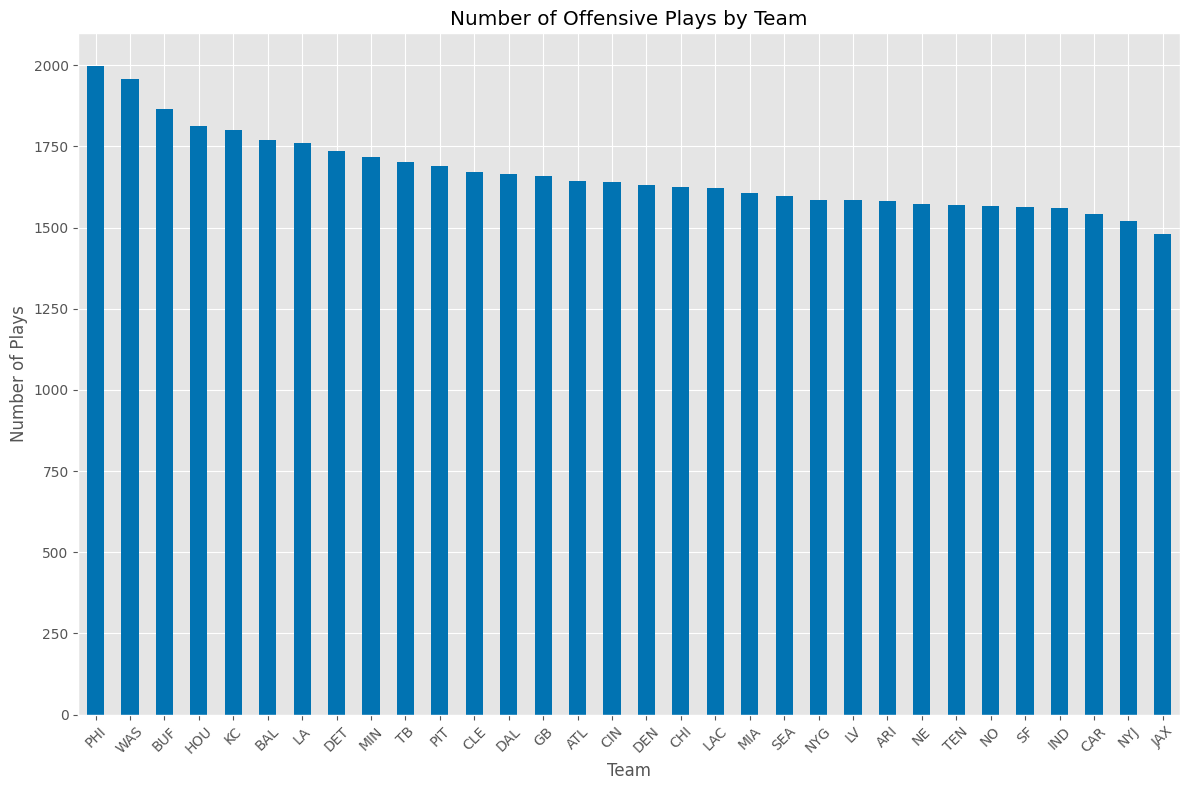

In [6]:

# Count games by team
if 'OffenseTeam' in df.columns:
    team_counts = df['OffenseTeam'].value_counts()
    print(f"Number of unique teams: {len(team_counts)}")
    
    plt.figure(figsize=(12, 8))
    team_counts.plot(kind='bar')
    plt.title('Number of Offensive Plays by Team')
    plt.xlabel('Team')
    plt.ylabel('Number of Plays')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [7]:

# Count games
if 'GameId' in df.columns:
    game_counts = df['GameId'].nunique()
    print(f"Number of games: {game_counts}")

# ## Play Type Analysis

Number of games: 284


Play type distribution:
PlayType
PASS                    19551
RUSH                    14031
KICK OFF                 2957
TIMEOUT                  2118
PUNT                     2116
SACK                     1474
EXTRA POINT              1304
SCRAMBLE                 1199
FIELD GOAL               1162
NO PLAY                   974
QB KNEEL                  434
TWO-POINT CONVERSION      152
FUMBLES                   124
CLOCK STOP                 79
EXCEPTION                   7
PENALTY                     2
Name: count, dtype: int64


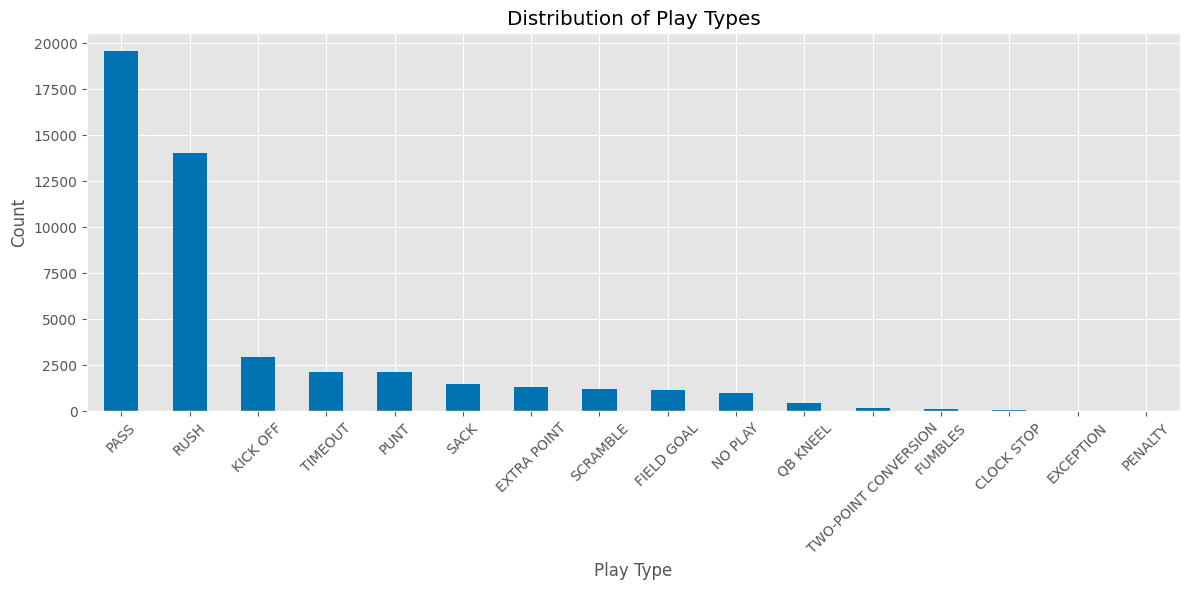

In [8]:

# Distribution of play types
if 'PlayType' in df.columns:
    play_types = df['PlayType'].value_counts()
    print("Play type distribution:")
    print(play_types)
    
    # Plot play type distribution
    plt.figure(figsize=(12, 6))
    play_types.plot(kind='bar')
    plt.title('Distribution of Play Types')
    plt.xlabel('Play Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

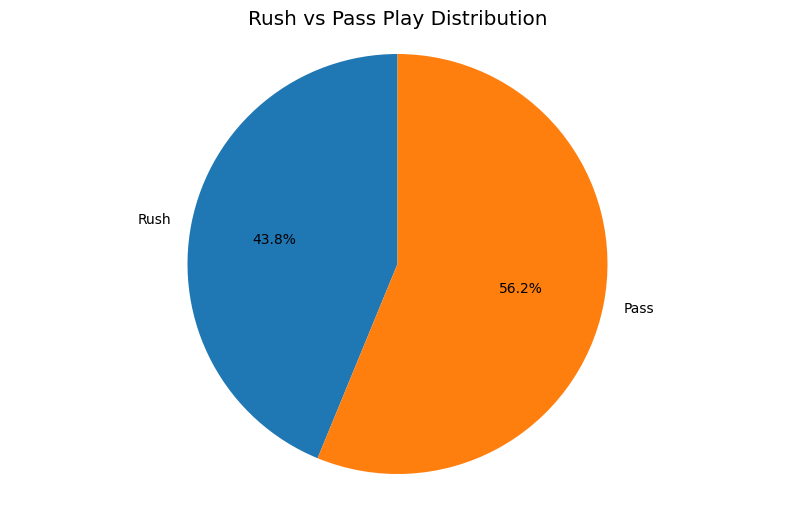

Rush plays: 15230 (43.8%)
Pass plays: 19551 (56.2%)


In [9]:

# Rush vs Pass distribution
if 'IsRush' in df.columns and 'IsPass' in df.columns:
    # Count rush and pass plays
    rush_count = df['IsRush'].sum()
    pass_count = df['IsPass'].sum()
    
    # Create pie chart
    plt.figure(figsize=(10, 6))
    plt.pie([rush_count, pass_count], labels=['Rush', 'Pass'], autopct='%1.1f%%', 
            colors=['#1f77b4', '#ff7f0e'], startangle=90)
    plt.axis('equal')
    plt.title('Rush vs Pass Play Distribution')
    plt.show()
    
    print(f"Rush plays: {rush_count} ({rush_count/(rush_count+pass_count):.1%})")
    print(f"Pass plays: {pass_count} ({pass_count/(rush_count+pass_count):.1%})")

# ## Down and Distance Analysis

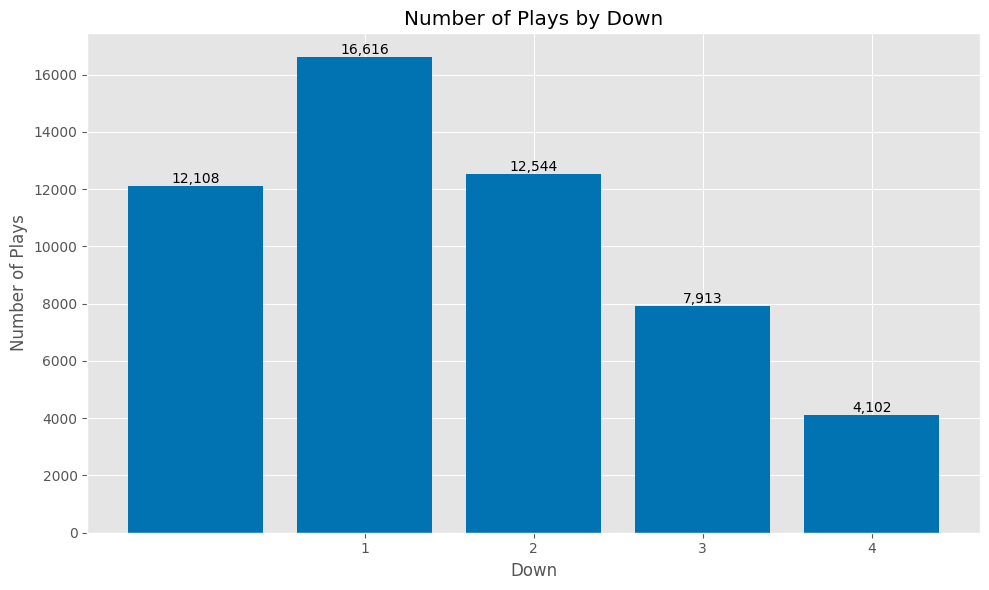

In [10]:

# Distribution of plays by down
if 'Down' in df.columns:
    down_counts = df['Down'].value_counts().sort_index()
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(down_counts.index, down_counts.values)
    
    # Add count labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{height:,}', ha='center', va='bottom')
    
    plt.title('Number of Plays by Down')
    plt.xlabel('Down')
    plt.ylabel('Number of Plays')
    plt.xticks([1, 2, 3, 4])
    plt.tight_layout()
    plt.show()

/Users/abdullah/Projects/nfl-pbp-analysis/.conda/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


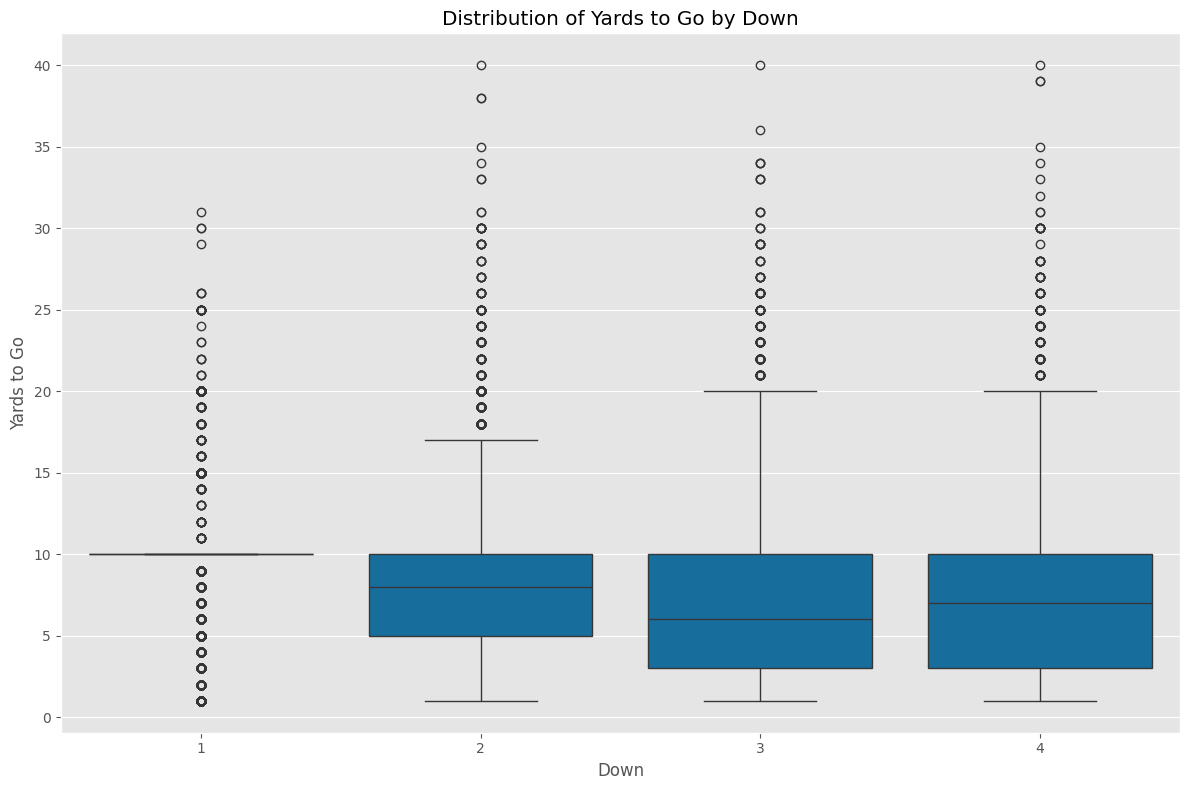

In [11]:

# Distribution of yards to go by down
if 'Down' in df.columns and 'ToGo' in df.columns:
    # Filter plays with valid Down and ToGo values
    valid_plays = df[(df['Down'].isin([1, 2, 3, 4])) & (~pd.isna(df['ToGo']))]
    
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Down', y='ToGo', data=valid_plays)
    plt.title('Distribution of Yards to Go by Down')
    plt.xlabel('Down')
    plt.ylabel('Yards to Go')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

# ## Field Position Analysis

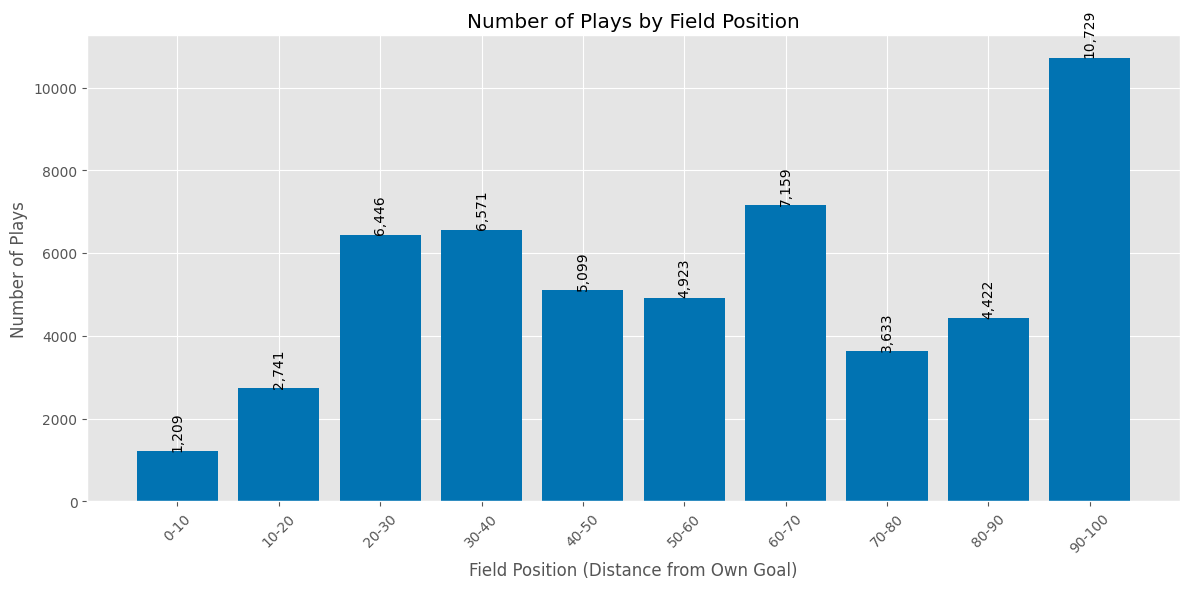

In [12]:

# Distribution of plays by field position
if 'field_position' in df.columns:
    # Group field position into 10-yard segments
    df['field_position_bin'] = pd.cut(
        df['field_position'], 
        bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        labels=['0-10', '10-20', '20-30', '30-40', '40-50', 
                '50-60', '60-70', '70-80', '80-90', '90-100']
    )
    
    pos_counts = df['field_position_bin'].value_counts().sort_index()
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(pos_counts.index, pos_counts.values)
    
    # Add count labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{height:,}', ha='center', va='bottom', rotation=90)
    
    plt.title('Number of Plays by Field Position')
    plt.xlabel('Field Position (Distance from Own Goal)')
    plt.ylabel('Number of Plays')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ## Play Success Analysis

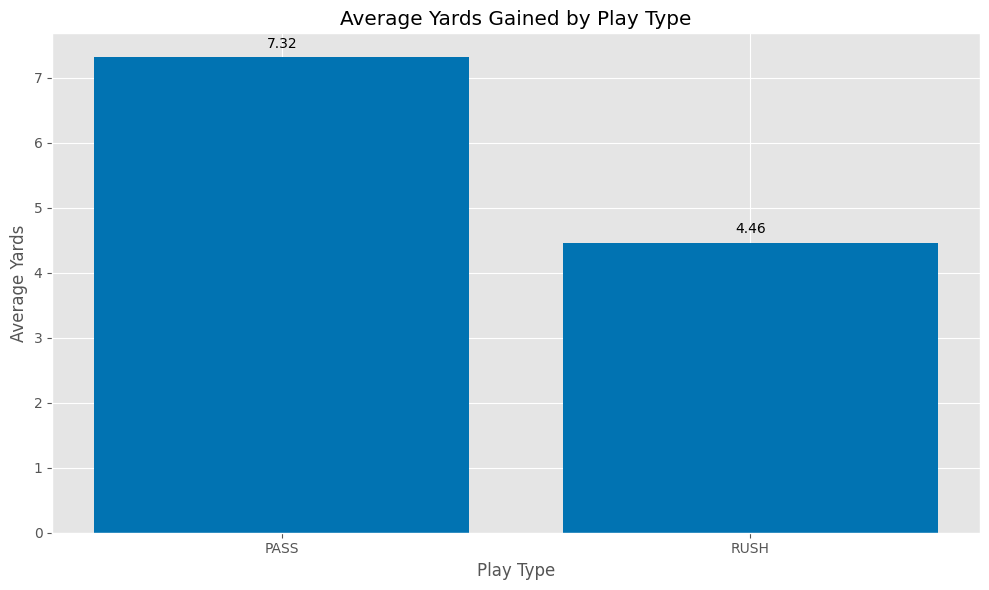

  PlayType      mean  count
0     PASS  7.316608  19551
1     RUSH  4.458414  14031


In [13]:

# Average yards gained by play type
if 'PlayType' in df.columns and 'Yards' in df.columns:
    # Filter for rush and pass plays
    rush_pass_df = df[df['PlayType'].isin(['RUSH', 'PASS']) & (~pd.isna(df['Yards']))]
    
    # Calculate average yards by play type
    avg_yards = rush_pass_df.groupby('PlayType')['Yards'].agg(['mean', 'count']).reset_index()
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(avg_yards['PlayType'], avg_yards['mean'])
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{height:.2f}', ha='center', va='bottom')
    
    plt.title('Average Yards Gained by Play Type')
    plt.xlabel('Play Type')
    plt.ylabel('Average Yards')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()
    
    print(avg_yards)

# ## Time Analysis

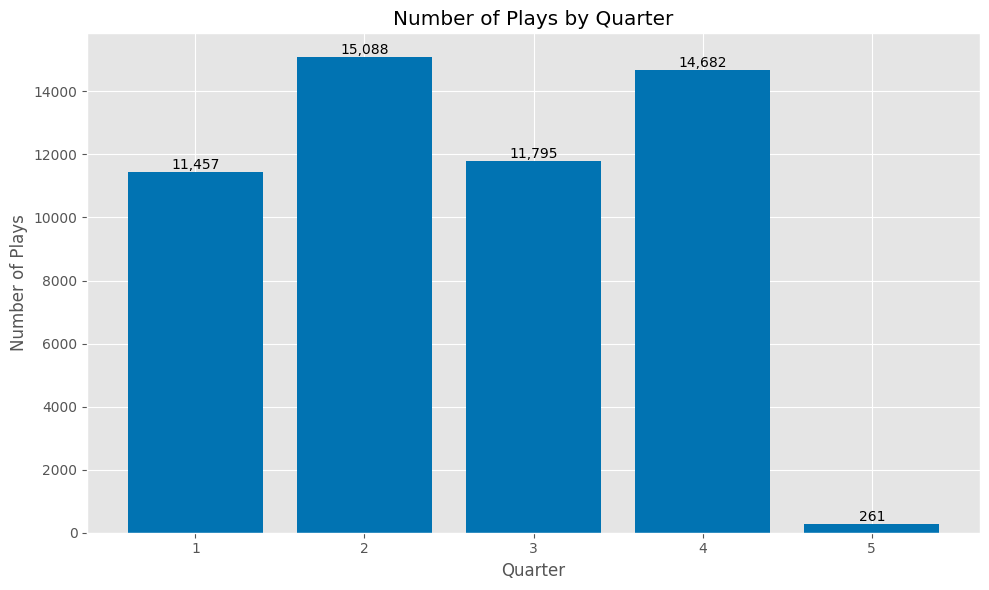

In [14]:

# Distribution of plays by quarter
if 'Quarter' in df.columns:
    quarter_counts = df['Quarter'].value_counts().sort_index()
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(quarter_counts.index, quarter_counts.values)
    
    # Add count labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{height:,}', ha='center', va='bottom')
    
    plt.title('Number of Plays by Quarter')
    plt.xlabel('Quarter')
    plt.ylabel('Number of Plays')
    plt.xticks([1, 2, 3, 4, 5])  # Include overtime (5)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

# ## Summary and Next Steps

In [15]:

# Print summary of dataset
print("NFL Play-by-Play Dataset Summary:")
print(f"- Total number of plays: {len(df):,}")
if 'GameId' in df.columns:
    print(f"- Number of games: {df['GameId'].nunique():,}")
if 'PlayType' in df.columns:
    print(f"- Number of play types: {df['PlayType'].nunique()}")
    print(f"- Most common play type: {df['PlayType'].value_counts().index[0]}")
if 'OffenseTeam' in df.columns:
    print(f"- Number of teams: {df['OffenseTeam'].nunique()}")

print("\nNext steps for analysis:")
print("1. Team-specific play calling tendencies")
print("2. Down and distance situational analysis")
print("3. Red zone efficiency analysis")
print("4. Fourth down decision making")
print("5. Play success rate by team and situation") 

NFL Play-by-Play Dataset Summary:
- Total number of plays: 53,283
- Number of games: 284
- Number of play types: 16
- Most common play type: PASS
- Number of teams: 32

Next steps for analysis:
1. Team-specific play calling tendencies
2. Down and distance situational analysis
3. Red zone efficiency analysis
4. Fourth down decision making
5. Play success rate by team and situation
